<a href="https://colab.research.google.com/github/JavohirTF7/machine-learning/blob/main/Diabet_kasallagiga_tashxis_qo'yish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!wget "https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv"

In [3]:
d=pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
d['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
cor=d.corrwith(d['Outcome'])
cor.sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [9]:
cor=d.corr().abs()
cor.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


ML ga tayyorlash

In [10]:
x=d.drop(['Outcome','BloodPressure','SkinThickness'],axis=1)
y=d['Outcome']


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_pp=Pipeline([('scaler',StandardScaler())])

X=num_pp.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=52)

In [13]:
y_test

40     0
316    0
199    1
473    0
418    0
      ..
714    0
168    0
450    0
445    1
431    0
Name: Outcome, Length: 77, dtype: int64

#machine Learning

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23) # k-ni qiymati

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

#Baholash

In [15]:
y_predict = knn.predict(x_test)

In [16]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.45714285714285713

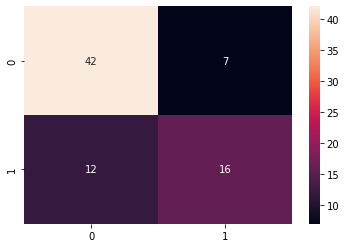

In [17]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.70      0.57      0.63        28

    accuracy                           0.75        77
   macro avg       0.74      0.71      0.72        77
weighted avg       0.75      0.75      0.75        77



In [19]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 4)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.71      0.54      0.61       268

    accuracy                           0.76       768
   macro avg       0.75      0.71      0.72       768
weighted avg       0.76      0.76      0.75       768



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 35)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])})

In [21]:

knn_gscv.cv_results_['rank_test_score']

array([34, 32, 33, 31, 28, 10,  1, 17,  6, 22,  5,  7,  2,  3, 26, 27, 13,
       29, 23, 30,  4, 19, 24,  8,  8, 20, 14, 15, 25, 10, 12, 18, 21, 15],
      dtype=int32)

In [22]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [23]:
knn_gscv.best_score_

0.7422544775485951

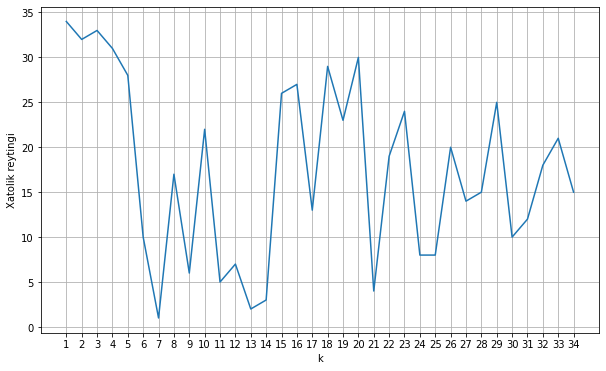

In [24]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()